<a href="https://colab.research.google.com/github/shreyabhonagiri/AI-/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import numpy as np
import math as mt
import random
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/slr09 (1).csv')
data.head()

In [ ]:
	X	Y
0	7.6	157
1	7.1	174
2	8.2	175
3	7.5	188
4	7.4	171

In [ ]:
outliers = []
def detect_outliers_zscore(data):
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/std
    if(np.abs(z_score) > thres):
      outliers.append(i)
  return outliers

In [ ]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X column from Z-scores method: ", sample_outliers_X)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)

In [ ]:
print(data.isnull().sum())

In [ ]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)

In [ ]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min() 
y_max = data['Y'].max()
print(x_min, x_max, y_min, y_max)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X1 = np.array(data['X']).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(X1)
X_scaled = scaler.transform(X1)
data['X'] = X_scaled.reshape(1,-1)[0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.10, random_state = 10)

In [ ]:
m = random.uniform(-20, 20)
c = random.uniform(-20, 20)
eta = 0.1
epochs = 2000

In [ ]:
def gradient(m, c, x, y):
  m_deriv = -1*(y - m*x -c)*x;
  c_deriv = -1*(y - m*x - c)
  return m_deriv, c_deriv

In [ ]:
for iter in range(epochs):
  for sample in range(x_train.shape[0]):
    der_m, der_c = gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m = m - eta*der_m
    c = c - eta*der_c
print('Model Parameters are ', m, c)

In [ ]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m*i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)
print(y_pred_train)

In [ ]:
y_pred_test = []
for i in x_test:
  y_pr_te = (m*i) + c
  y_pred_test.append(y_pr_te)
y_pred_test = np.array(y_pred_test)
print(y_pred_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

In [ ]:
mse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

In [ ]:
X=float(input('Enter PH value of well water'))
print('X=',X)

x_nor = (X - x_min)/(x_max - x_min)
y_nor = m*x_nor + c

Y = y_nor*(y_max - y_min) + y_min 
print('Bi-carbonates = ',Y)

In [ ]:
X=float(input('Enter PH value of well water'))
print('X=',X)

x_nor = (X - x_min)/(x_max - x_min)
y_nor = m*x_nor + c

Y = y_nor*(y_max - y_min) + y_min 
print('Bi-carbonates = ',Y)

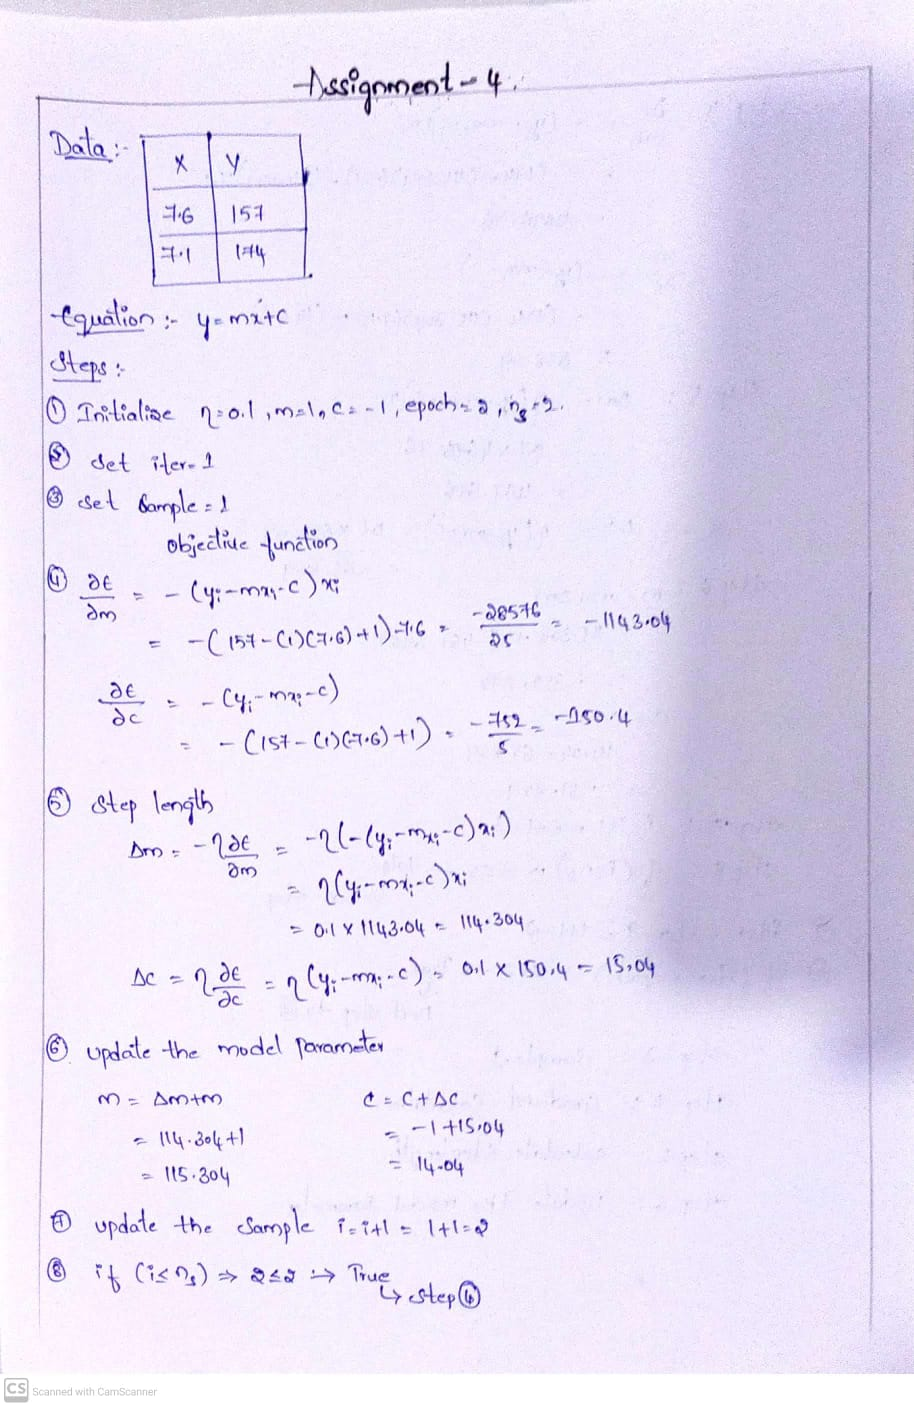

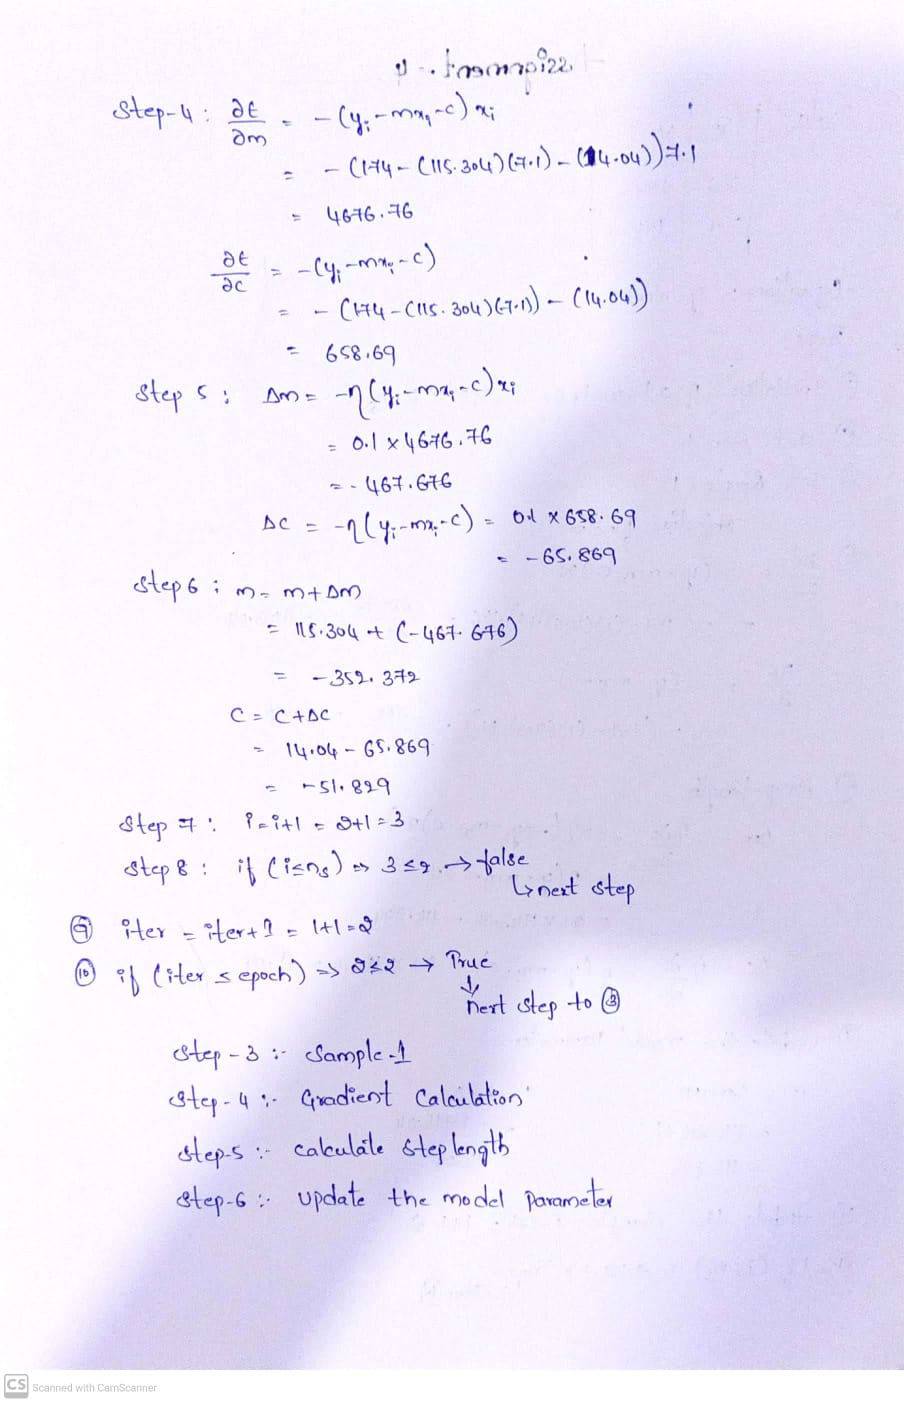

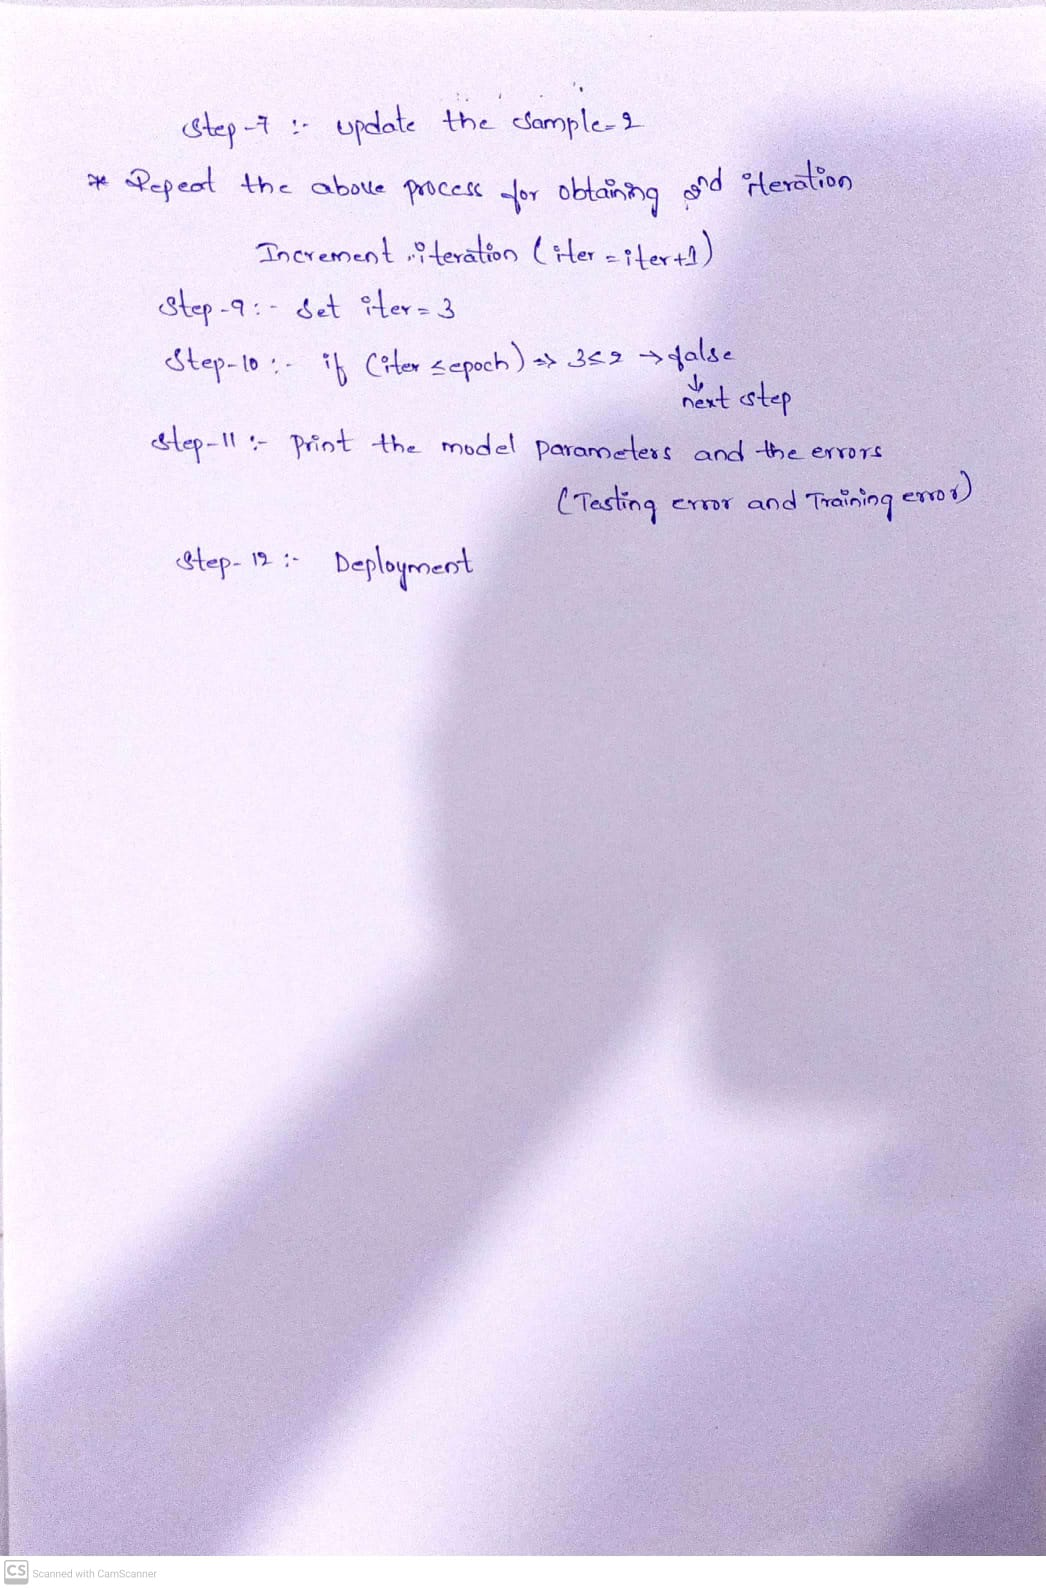